# Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions
- Load the dataset and explore the variables.

- We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

- Extract the target variable.

- Extract the independent variables and scale them.

- Build the logistic regression model.

- Evaluate the model.

- Even a simple model will give us more than 70% accuracy. Why?

- Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds 
new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
# Import data

import pandas as pd
import numpy as np


data = pd.read_csv('customer_churn.csv')

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data2 = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
display(data2.head())

data2.isna().sum()
data2.info()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [4]:
col=[]
for columns in data2.columns:
    col.append(columns.lower().replace(' ',"_"))
data2.columns=col
data2

,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [5]:
# X-y split

X = data2.drop(['churn'],axis=1)
y= data2['churn']

# Train-Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

X_train

,tenure,seniorcitizen,monthlycharges
877,51,0,60.15
5792,15,1,96.30
5334,49,0,107.95
878,60,0,64.75
6578,10,0,73.55
...,...,...,...
79,45,0,25.90
3927,3,0,20.55
5955,72,0,68.40
6936,5,0,80.15


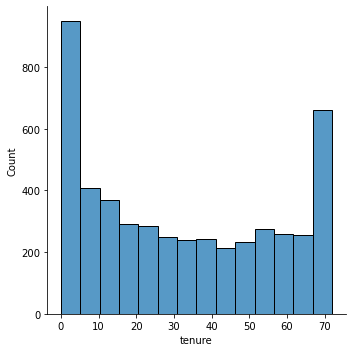

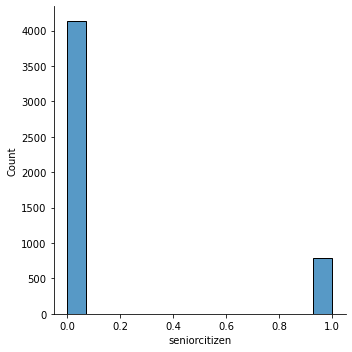

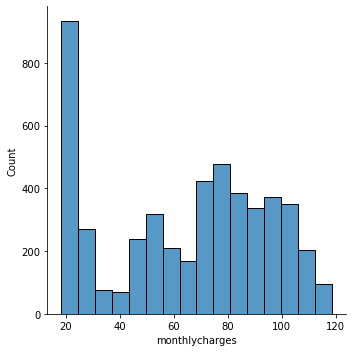

In [6]:
# Plot independent variables

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(X_train['tenure'])
plt.show()

sns.displot(X_train['seniorcitizen'])
plt.show()

sns.displot(X_train['monthlycharges'])
plt.show()

In [8]:
# Scale the data with min Max Scaler

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()

transformer.fit(X_train) 

X_train_scaled = transformer.transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled


,tenure,seniorcitizen,monthlycharges
0,0.708333,0.0,0.417539
1,0.208333,1.0,0.777778
2,0.680556,0.0,0.893871
3,0.833333,0.0,0.463378
4,0.138889,0.0,0.551071
...,...,...,...
4925,0.625000,0.0,0.076233
4926,0.041667,0.0,0.022920
4927,1.000000,0.0,0.499751
4928,0.069444,0.0,0.616841


In [9]:
# Run the logistic model on the scaled dataset

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr' )

classification.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [10]:
# apply scaler to X_test_final
X_test_scaled = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,tenure,seniorcitizen,monthlycharges
0,0.694444,0.0,0.022920
1,1.000000,0.0,0.015944
2,0.875000,0.0,0.503737
3,0.847222,0.0,0.059292
4,0.097222,0.0,0.010463


In [11]:
y_train_pred = classification.predict(X_train_scaled)
y_test_pred  = classification.predict(X_test_scaled)
print("The first predictions on the TRAIN set are: ",y_train_pred[:5])
print("The first predictions on the TEST set are: ",y_test_pred[:5])

The first predictions on the TRAIN set are:  ['No' 'Yes' 'No' 'No' 'No']
The first predictions on the TEST set are:  ['No' 'No' 'No' 'No' 'No']


The confusion matrix on the TRAIN set is: 


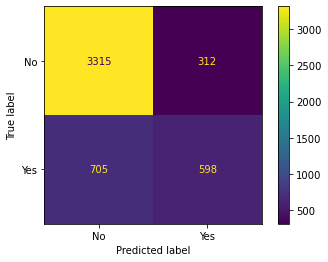

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

In [16]:
# Further Model Evaluation
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The precission in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label='No')))
print("The precission in the TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred, pos_label='No')))
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label='No')))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label='No')))
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label='No')))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label='No')))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TRAIN set is: 0.794
The accuracy in the TEST  set is: 0.780
The precission in the TRAIN set is: 0.825
The precission in the TEST  set is: 0.816
The recall in the TRAIN set is: 0.914
The recall in the TEST  set is: 0.904
The F1-score for the TRAIN set is 0.87
The F1-score for the TEST set is 0.86
The Kappa in the Test set is: 0.38


#### Even a simple model will give us more than 70% accuracy. Why?

The accuracy of the model is quite high, because it it really good in predicting "No", since the target variable is highly imbalanced towards the class "no". This allows the model to become much better in predicting 'no'. It does make a lot of errors in predicting "yes" though.

In [18]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

##### SMOTE

Synthetic Minority Oversampling Technique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [19]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE(random_state=100,k_neighbors=2)
X_train_smote,y_train_smote = sm.fit_resample(X_train_scaled,y_train)

In [60]:
print(y_train_smote.shape)
print(X_train_smote.shape)
print(y_train_smote.value_counts())

(7254,)
(7254, 3)
No     3627
Yes    3627
Name: churn, dtype: int64


In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_smote, y_train_smote)

pred = lr.predict(X_test_scaled)


print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, pred)))
print("The precission in the TEST  set is: {:.3f}".format(precision_score(y_test, pred, pos_label='No')))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  pred, pos_label='No')))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,pred, pos_label='No')))
print("The Kappa in the Test set is: {:.2f}".format(cohen_kappa_score(y_test,pred)))

The accuracy in the TEST  set is: 0.715
The precission in the TEST  set is: 0.878
The recall in the TEST  set is: 0.709
The F1-score for the TEST set is 0.78
The Kappa in the Test set is: 0.38


The confusion matrix on the TRAIN set is: 


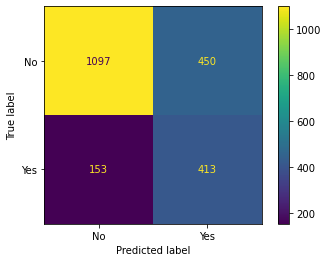

In [62]:
print("The confusion matrix on the TRAIN set is: ")
cm_train = confusion_matrix(y_test, pred)
cm_train

disp = ConfusionMatrixDisplay(cm_train,display_labels=classification.classes_);
disp.plot()
plt.show()

#### Conclusion on SMOTE

It didn't really improve the model, actually it just changed the focus of what the model is good at. In the beginning the model was really good at predicting "No" values and bad at predicting "Yes". This came through the highly imbalanced data set. Now after we used smote to balance the data, the model improved in predicting "yes" values but on the other hand it got much worse in predicting "no" values. Overall smote shifted the performance in regards to what it is good at but didn't really improve it overall.


